In [1]:
import sys
import os
os.chdir('..')
sys.path.append('py//models')
from model_funs import *
X, y = get_x_y('data_for_modelling')
X_hold, y_hold = get_x_y('holdout')

In [17]:
model = get_model_pipeline(X, 
                           KNeighborsRegressor(), 
                           standartize = True
        )
param_grid = {'model__n_neighbors': np.arange(5, 70),  
              'model__weights': ['uniform', 'distance'], 
              'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
              }

grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_error', 
                           verbose = 1,
                           n_jobs = 5
             )

grid_search.fit(X, y)


print("Best Parameters:", grid_search.best_params_)
print("Best MAE: {:.2f}".format(-grid_search.best_score_))

Fitting 5 folds for each of 520 candidates, totalling 2600 fits
Best Parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 14, 'model__weights': 'distance'}
Best MAE: 25178.21


In [8]:
mae_results_dict = dict()
for i in range(1, 11):
    patterns_components = [['parks', min(i, 9)], 
                           ['edu', min(i, 6)],
                           ['shops', min(i, 5)],
                           ['moscow_stations', min(i, 5)],
                           ['bus_stops', min(i, 5)],
                           ['eco', min(i, 5)],
                           ['hospitals',  min(i, 2)]
                          ]
    pca_groups1 = get_PCA_groups(X, patterns_components)
    for j in range(1, 11):
        for k, pca_group in enumerate([pca_groups1, get_PCA_groups(X, ('all', i))]):
            print(f"PCA components: {i}, k_best: {j}")
            
            if (1 == 0
                or (k == 1 and j > i)
                or (k == 0 and i >= 10)
               ):
                print(f"skipping PCA components: {i}, k_best: {j}, pca_group: {k+1}")
                print("")
                print("")
                continue
                
            model = get_model_pipeline(X, 
                                       KNeighborsRegressor(), 
                                       pca_groups = pca_group,
                                       feature_selection = ('k_best', j),
                                       standartize = True
                    )
            param_grid = {'model__n_neighbors': np.arange(5, 70),  
                          'model__weights': ['uniform', 'distance'], 
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
                          }
            
            grid_search = GridSearchCV(model, 
                                       param_grid, 
                                       cv = 5, 
                                       scoring = 'neg_mean_absolute_error', 
                                       verbose = 1,
                                       n_jobs = 5
                         )
            grid_search.fit(X, y)
            
            print("Best Parameters:", grid_search.best_params_)
            print("Best MAE: {:.2f}".format(-grid_search.best_score_))
            mae_results_dict[f"{i}, {j}, {k}"] = -grid_search.best_score_
            
            print("")
            print("")

PCA components: 1, k_best: 1
parks: Explained Variance Ratio per Component: [0.32376045]
parks: Cumulative Explained Variance: 0.3238
edu: Explained Variance Ratio per Component: [0.52977431]
edu: Cumulative Explained Variance: 0.5298
shops: Explained Variance Ratio per Component: [0.395567]
shops: Cumulative Explained Variance: 0.3956
moscow_stations: Explained Variance Ratio per Component: [0.50439374]
moscow_stations: Cumulative Explained Variance: 0.5044
bus_stops: Explained Variance Ratio per Component: [0.49780078]
bus_stops: Cumulative Explained Variance: 0.4978
eco: Explained Variance Ratio per Component: [0.49611701]
eco: Cumulative Explained Variance: 0.4961
hospitals: Explained Variance Ratio per Component: [0.76014283]
hospitals: Cumulative Explained Variance: 0.7601
Fitting 5 folds for each of 520 candidates, totalling 2600 fits
Best Parameters: {'model__algorithm': 'brute', 'model__n_neighbors': 59, 'model__weights': 'uniform'}
Best MAE: 34203.77


PCA components: 1, k_be

C:\Users\UBAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'model__algorithm': 'brute', 'model__n_neighbors': 57, 'model__weights': 'uniform'}
Best MAE: 34207.35


PCA components: 9, k_best: 2
parks: Explained Variance Ratio per Component: [0.32376045 0.19020045 0.15013849 0.08290335 0.08049877 0.06779099
 0.05147385 0.03954147 0.01369219]
parks: Cumulative Explained Variance: 1.0000
edu: Explained Variance Ratio per Component: [0.52977431 0.16517055 0.09737048 0.0793241  0.07375867 0.05460189]
edu: Cumulative Explained Variance: 1.0000
shops: Explained Variance Ratio per Component: [0.395567   0.20900622 0.17562344 0.15392766 0.06587569]
shops: Cumulative Explained Variance: 1.0000
moscow_stations: Explained Variance Ratio per Component: [0.50439374 0.22453457 0.14348375 0.09300677 0.03458118]
moscow_stations: Cumulative Explained Variance: 1.0000
bus_stops: Explained Variance Ratio per Component: [0.49780078 0.23631003 0.1267466  0.1090351  0.03010749]
bus_stops: Cumulative Explained Variance: 1.0000
eco: Explained Variance

C:\Users\UBAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'model__algorithm': 'brute', 'model__n_neighbors': 12, 'model__weights': 'distance'}
Best MAE: 23739.19


PCA components: 9, k_best: 8
parks: Explained Variance Ratio per Component: [0.32376045 0.19020045 0.15013849 0.08290335 0.08049877 0.06779099
 0.05147385 0.03954147 0.01369219]
parks: Cumulative Explained Variance: 1.0000
edu: Explained Variance Ratio per Component: [0.52977431 0.16517055 0.09737048 0.0793241  0.07375867 0.05460189]
edu: Cumulative Explained Variance: 1.0000
shops: Explained Variance Ratio per Component: [0.395567   0.20900622 0.17562344 0.15392766 0.06587569]
shops: Cumulative Explained Variance: 1.0000
moscow_stations: Explained Variance Ratio per Component: [0.50439374 0.22453457 0.14348375 0.09300677 0.03458118]
moscow_stations: Cumulative Explained Variance: 1.0000
bus_stops: Explained Variance Ratio per Component: [0.49780078 0.23631003 0.1267466  0.1090351  0.03010749]
bus_stops: Cumulative Explained Variance: 1.0000
eco: Explained Varianc

C:\Users\UBAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 20, 'model__weights': 'distance'}
Best MAE: 22698.67


PCA components: 9, k_best: 10
parks: Explained Variance Ratio per Component: [0.32376045 0.19020045 0.15013849 0.08290335 0.08049877 0.06779099
 0.05147385 0.03954147 0.01369219]
parks: Cumulative Explained Variance: 1.0000
edu: Explained Variance Ratio per Component: [0.52977431 0.16517055 0.09737048 0.0793241  0.07375867 0.05460189]
edu: Cumulative Explained Variance: 1.0000
shops: Explained Variance Ratio per Component: [0.395567   0.20900622 0.17562344 0.15392766 0.06587569]
shops: Cumulative Explained Variance: 1.0000
moscow_stations: Explained Variance Ratio per Component: [0.50439374 0.22453457 0.14348375 0.09300677 0.03458118]
moscow_stations: Cumulative Explained Variance: 1.0000
bus_stops: Explained Variance Ratio per Component: [0.49780078 0.23631003 0.1267466  0.1090351  0.03010749]
bus_stops: Cumulative Explained Variance: 1.0000
eco: Explained Varianc

In [13]:
dict(sorted(mae_results_dict.items(), key=lambda item: item[1]))

{'10, 10, 1': 22683.5566527454,
 '9, 9, 1': 22698.674729526847,
 '10, 9, 1': 22698.674729526847,
 '8, 8, 1': 23019.417162100097,
 '9, 8, 1': 23019.417162100097,
 '10, 8, 1': 23019.417162100097,
 '7, 7, 1': 23739.19224256866,
 '8, 7, 1': 23739.19224256866,
 '9, 7, 1': 23739.19224256866,
 '10, 7, 1': 23739.19224256866,
 '6, 6, 1': 24088.967660244998,
 '7, 6, 1': 24088.967660244998,
 '8, 6, 1': 24088.967660244998,
 '9, 6, 1': 24088.967660244998,
 '10, 6, 1': 24088.967660244998,
 '5, 5, 1': 25239.97614532408,
 '6, 5, 1': 25239.97614532408,
 '7, 5, 1': 25239.97614532408,
 '8, 5, 1': 25239.97614532408,
 '9, 5, 1': 25239.97614532408,
 '10, 5, 1': 25239.97614532408,
 '4, 4, 1': 25613.807238908972,
 '5, 4, 1': 25613.807238908972,
 '6, 4, 1': 25613.807238908972,
 '7, 4, 1': 25613.807238908972,
 '8, 4, 1': 25613.807238908972,
 '9, 4, 1': 25613.807238908972,
 '10, 4, 1': 25613.807238908972,
 '3, 3, 1': 26289.006477104027,
 '4, 3, 1': 26289.006477104027,
 '5, 3, 1': 26289.006477104027,
 '6, 3, 1': 

In [19]:
i = 10
patterns_components = [['parks', min(i, 9)], 
                           ['edu', min(i, 6)],
                           ['shops', min(i, 5)],
                           ['moscow_stations', min(i, 5)],
                           ['bus_stops', min(i, 5)],
                           ['eco', min(i, 5)],
                           ['hospitals',  min(i, 2)]
                          ]

model = get_model_pipeline(X, 
                           KNeighborsRegressor(), 
                           pca_groups = get_PCA_groups(X, ('all', 10)),
                           feature_selection = ('k_best', 10),
                           standartize = True
        )
param_grid = {'model__n_neighbors': np.arange(5, 70),  
              'model__weights': ['uniform', 'distance'], 
              'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
              }

grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_error', 
                           verbose = 1,
                           n_jobs = 5
             )
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best MAE: {:.2f}".format(-grid_search.best_score_))

all: Explained Variance Ratio per Component: [0.26122786 0.05374642 0.04691406 0.03920592 0.0345376  0.03109392
 0.02974972 0.0291486  0.02773239 0.02509565]
all: Cumulative Explained Variance: 0.5785
Fitting 5 folds for each of 520 candidates, totalling 2600 fits
Best Parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 17, 'model__weights': 'distance'}
Best MAE: 22683.56


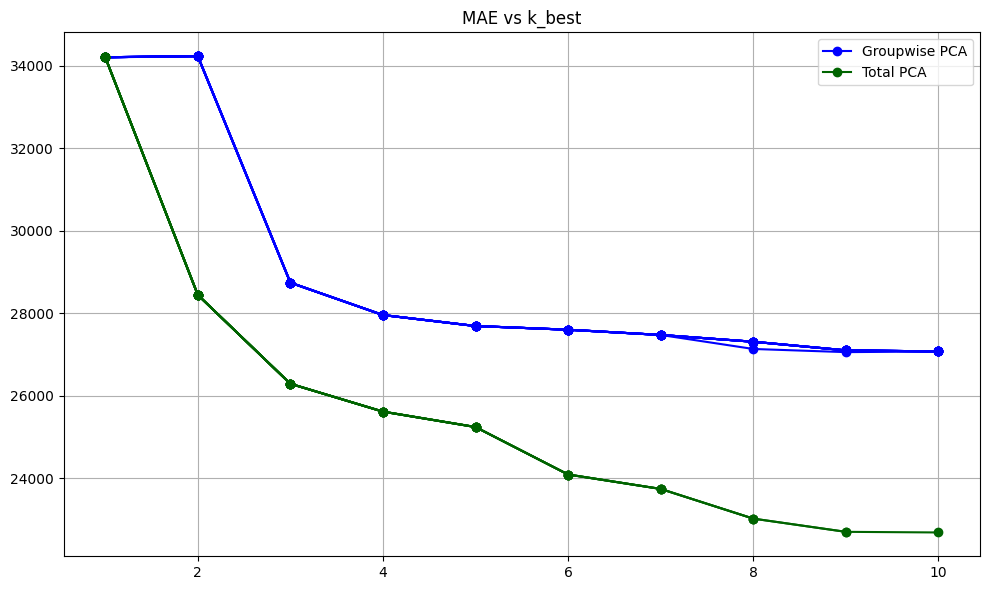

In [22]:
mae_df = pd.DataFrame.from_dict(mae_results_dict, orient = 'index', columns = ['MAE']).reset_index()
mae_df[['PCA components', 'k_best', 'groupwise PCA']] = mae_df['index'].str.split(', ', expand = True).astype(int)
mae_df.to_csv("csv//models//KNN_k_best_results.csv", index = False)

              
mae_df = mae_df.drop(['index'], axis = 1)

# Function to plot MAE vs k_best with PCA components as lines
def plot_combined_mae(df):
    plt.figure(figsize=(10, 6))

    # Plot for groupwise PCA = 0
    subset_0 = df.query("`groupwise PCA` == 0")
    for pca in subset_0['PCA components'].unique():
        group = subset_0[subset_0['PCA components'] == pca]
        plt.plot(group['k_best'], group['MAE'], marker='o', linestyle='-', label=f'groupwise=0, PCA={pca}', color = 'blue')

    # Plot for groupwise PCA = 1
    subset_1 = df.query("`groupwise PCA` == 1")
    for pca in subset_1['PCA components'].unique():
        group = subset_1[subset_1['PCA components'] == pca]
        plt.plot(group['k_best'], group['MAE'], marker='o', linestyle='-', label=f'groupwise=1, PCA={pca}', color = 'darkgreen')

    # Labels and grid
    plt.title('MAE vs k_best')
    plt.grid()
    plt.tight_layout()


plot_combined_mae(mae_df)

from matplotlib.lines import Line2D
custom_legend = [
    Line2D([0], [0], color='blue', linestyle='-', marker='o', label='Groupwise PCA'),
    Line2D([0], [0], color='darkgreen', linestyle='-', marker='o', label='Total PCA')
]
plt.legend(handles = custom_legend, loc = "upper right")
plt.show()

In [4]:
model = get_model_pipeline(X, 
                           KNeighborsRegressor(), 
                           pca_groups = None,
                           feature_selection = ('n_best_fits', 6), 
                           standartize = True
        )
param_grid = {'model__n_neighbors': np.arange(5, 70),  
              'model__weights': ['uniform', 'distance'], 
              'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
              }

grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_error', 
                           verbose = 1,
                           n_jobs = 5
             )
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best MAE: {:.2f}".format(-grid_search.best_score_))

Fitting 5 folds for each of 520 candidates, totalling 2600 fits
Selected Features: ['latitude', 'longitude', 'meters', 'center_dist', 'bus_stations_closest_km', 'train_stations_closest_km']
Total feature combinations: 63
Evaluating combination: ['latitude']
Combination: ['latitude'], Mean CV Score: -45794.24769422006
Evaluating combination: ['longitude']
Combination: ['longitude'], Mean CV Score: -43800.41663050952
Evaluating combination: ['meters']
Combination: ['meters'], Mean CV Score: -38407.92374993981
Evaluating combination: ['center_dist']
Combination: ['center_dist'], Mean CV Score: -41384.31187380467
Evaluating combination: ['bus_stations_closest_km']
Combination: ['bus_stations_closest_km'], Mean CV Score: -42794.60055388885
Evaluating combination: ['train_stations_closest_km']
Combination: ['train_stations_closest_km'], Mean CV Score: -43842.19941791727
Evaluating combination: ['latitude', 'longitude']
Combination: ['latitude', 'longitude'], Mean CV Score: -36741.85473191212

In [2]:
model = get_model_pipeline(X, 
                           KNeighborsRegressor(), 
                           pca_groups = get_PCA_groups(X, ('all', 10)),
                           feature_selection = ('k_best', 10),
                           standartize = True
        )
param_grid = {'model__n_neighbors': np.arange(5, 70),  
              'model__weights': ['uniform', 'distance'], 
              'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
              }

grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv = 5, 
                           scoring = 'neg_mean_absolute_error', 
                           verbose = 1,
                           n_jobs = 5
             )
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best MAE: {:.2f}".format(-grid_search.best_score_))


model = grid_search.best_estimator_
errors = model.predict(X_hold) - y_hold
print(np.abs(errors).describe())
get_MAE(errors)
get_MAPE(errors, y_hold)

all: Explained Variance Ratio per Component: [0.26122786 0.05374642 0.04691406 0.03920592 0.0345376  0.03109392
 0.02974972 0.0291486  0.02773239 0.02509565]
all: Cumulative Explained Variance: 0.5785
Fitting 5 folds for each of 520 candidates, totalling 2600 fits
Best Parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 17, 'model__weights': 'distance'}
Best MAE: 22683.56
count     1000.0000
mean     22257.2035
std      26756.5053
min          5.9602
25%       6006.2134
50%      13068.8672
75%      26801.5687
max     202336.4483
Name: price, dtype: float64
MAE 22257.203533448414
MAPE 19.822486078840974%


0.19822486078840976

In [25]:
print(f"errors 95%: {np.quantile(errors, 0.95)}")
print(f"errors 5%: {np.quantile(errors, 0.05)}")

errors 95%: 45223.02865262585
errors 5%: -68851.91543626376
